## test.ipynb: Test the training result and Evaluate model
- tensorflow2 的结果

In [1]:
# Import the necessary libraries
from sklearn.decomposition import PCA
import os
import scipy.io as sio
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras import utils
from sklearn.metrics import classification_report, confusion_matrix
# itertools内置库
import itertools
import spectral
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Global Variables
windowSize = 5
numPCAcomponents = 30
testRatio = 0.80

# show current path
PATH = os.getcwd()
print (PATH)

e:\Eric_HSI\excise3


In [3]:
# Define the neccesary functions for later use
# load the Indian pines dataset which is the .mat format
#  load the Indian pines dataset which is the .mat format
def loadIndianPinesData():
    data_path = 'E:\Eric_HSI\hyperspectral_datasets'
    data = sio.loadmat(os.path.join(data_path, 
                      'Indian_pines_corrected.mat'))['data']
    labels = sio.loadmat(os.path.join(data_path, 
                        'Indian_pines_gt.mat'))['groundT']
    
    return data, labels

In [4]:
data_dir= "./predata"
data_root = glob.glob(data_dir + '/*')
# print(data_root)

In [5]:
for name in glob.glob(data_dir + '/*'):
    print(name)

./predata\readme.txt
./predata\X_All_WS_5_PCA_30_testRatio_0.8.npy
./predata\X_test_WS_5_PCA_30_testRatio_0.8.npy
./predata\X_train_WS_5_PCA_30_testRatio_0.8.npy
./predata\y_All_WS_5_PCA_30_testRatio_0.8.npy
./predata\y_test_WS_5_PCA_30_testRatio_0.8.npy
./predata\y_train_WS_5_PCA_30_testRatio_0.8.npy


In [6]:
X_test = np.load(data_root[2])
y_test = np.load(data_root[5])
y_test = utils.to_categorical(y_test)

In [7]:
X_all = np.load(data_root[1])

In [8]:
# Get the model evaluation report, 
# include classification report, confusion matrix, Test_Loss, Test_accuracy
target_names = ['Alfalfa', 'Corn-notill', 'Corn-mintill', 'Corn'
           ,'Grass-pasture', 'Grass-trees', 'Grass-pasture-mowed', 
            'Hay-windrowed', 'Oats', 'Soybean-notill', 'Soybean-mintill',
           'Soybean-clean', 'Wheat', 'Woods', 'Buildings-Grass-Trees-Drives',
           'Stone-Steel-Towers']
def reports(X_test,y_test):
    Y_pred = model.predict(X_test)  #   是一个(5125, 16)的 ndarray 的概率值
    # 概率最大的值的位置就为预测的类别
    y_pred = np.argmax(Y_pred, axis=1)

    # 分类报告：precision    recall  f1-score   support
    classification = classification_report(np.argmax(y_test, axis=1), y_pred, target_names=target_names)
    # 混淆矩阵
    confusion = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
    # 模型得分
    score = model.evaluate(X_test, y_test, batch_size=32)
    Test_Loss = score[0]*100
    Test_accuracy = score[1]*100
    
    return classification, confusion, Test_Loss, Test_accuracy

In [9]:
# load the model architecture and weights
model = load_model('./model/HSI_model.h5')

# calculate result, loss, accuray and confusion matrix
classification, confusion, Test_loss, Test_accuracy = reports(X_test,y_test)
classification = str(classification)
confusion_str = str(confusion)

# show result and save to file
# print('Test loss {} (%)'.format(Test_loss))
# print('Test accuracy {} (%)'.format(Test_accuracy))
# print("classification result: ")
# print('{}'.format(classification))
# print("confusion matrix: ")
# print('{}'.format(confusion_str))
file_name = './result/report' + "WindowSize" + str(windowSize) + "PCA" + str(numPCAcomponents) + "testRatio" + str(testRatio) +".txt"
with open(file_name, 'w') as x_file:
    x_file.write('Test loss {} (%)'.format(Test_loss))
    x_file.write('\n')
    x_file.write('Test accuracy {} (%)'.format(Test_accuracy))
    x_file.write('\n')
    x_file.write('\n')
    x_file.write(" classification result: \n")
    x_file.write('{}'.format(classification))
    x_file.write('\n')
    x_file.write(" confusion matrix: \n")
    x_file.write('{}'.format(confusion_str))

257/257 [==============================] - 0s 1ms/step - loss: 0.7060 - acc: 0.9137


In [10]:
# 进行最后绘图
# 此函数接受混淆矩阵
# 并判断是否将混淆矩阵标准化输出
def plot_confusion_matrix(confusion, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.get_cmap("Blues")):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Normalization 的意思是将整个数据变为 0-1 之间
    """
    Normalized = confusion.astype('float') / confusion.sum(axis=1)[:, np.newaxis]
    if normalize:
        confusion = Normalized
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    # 显示混淆矩阵
    print(confusion)

    plt.imshow(Normalized, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    plt.title(title)

    # 设置x，y轴的标签为自定义的
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    # 如果将confusion 标准化与否的输出形式
    fmt = '.2f' if normalize else 'd'
    for i, j in itertools.product(range(confusion.shape[0]), range(confusion.shape[1])):
        thresh = confusion[i].max() / 2.
        # 画图时给图中的点加标签之 plt.text，
        plt.text(j, i, format(confusion[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if confusion[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[  21    0    0    0    0    0    0   16    0    0    0    0    0    0
     0    0]
 [   0 1023   30    0    0    0    0    1    0   12   55   21    0    0
     1    0]
 [   0   45  585   10    0    1    0    0    0    2   19    2    0    0
     0    0]
 [   0   25    5  148    0    0    0    6    4    0    0    0    2    0
     0    0]
 [   6    4    0    1  365    4    0    0    0    0    1    4    0    0
     1    0]
 [   0    0    0    0    0  583    0    0    0    0    0    1    0    0
     0    0]
 [   0    0    0    0    0    0   21    1    0    0    0    0    0    0
     0    0]
 [   0    0    0    0    0    0    0  382    0    0    0    0    0    0
     0    0]
 [   0    0    0    0    0    0    0    0   16    0    0    0    0    0
     0    0]
 [   0   20    4    0    1    1    0    0    0  644   95   13    0    0
     0    0]
 [   0   98   14    3    0    1    0    2    0   15 1787   34    3    1
     0    6]
 [   0   15    1    4    

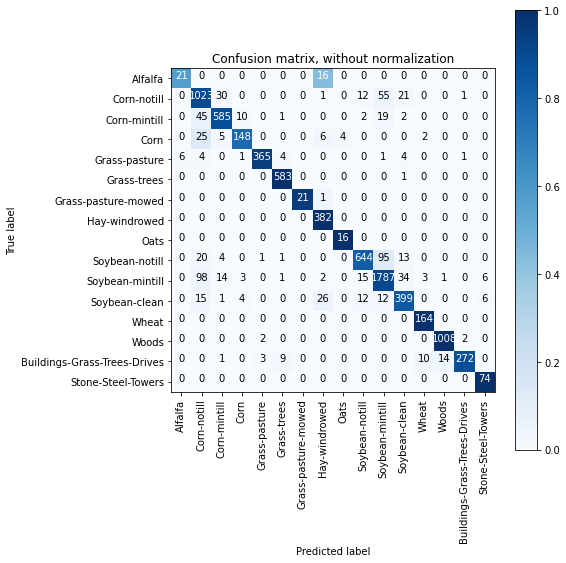

In [11]:
plt.figure(figsize=(8,8))
plot_confusion_matrix(confusion, classes=target_names, normalize=False, 
                      title='Confusion matrix, without normalization')
# SVG它的英文全称为Scalable Vector Graphics，意思为可缩放的矢量图形
plt.savefig("./result/confusion_matrix_without_normalization.svg")
# plt.show()

Normalized confusion matrix
[[5.67567568e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 4.32432432e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 8.95013123e-01 2.62467192e-02 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 8.74890639e-04
  0.00000000e+00 1.04986877e-02 4.81189851e-02 1.83727034e-02
  0.00000000e+00 0.00000000e+00 8.74890639e-04 0.00000000e+00]
 [0.00000000e+00 6.77710843e-02 8.81024096e-01 1.50602410e-02
  0.00000000e+00 1.50602410e-03 0.00000000e+00 0.00000000e+00
  0.00000000e+00 3.01204819e-03 2.86144578e-02 3.01204819e-03
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.31578947e-01 2.63157895e-02 7.78947368e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 3.15789474e-02
  2.10526316e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.05263158e-02 0.00000000e+00 0.00000

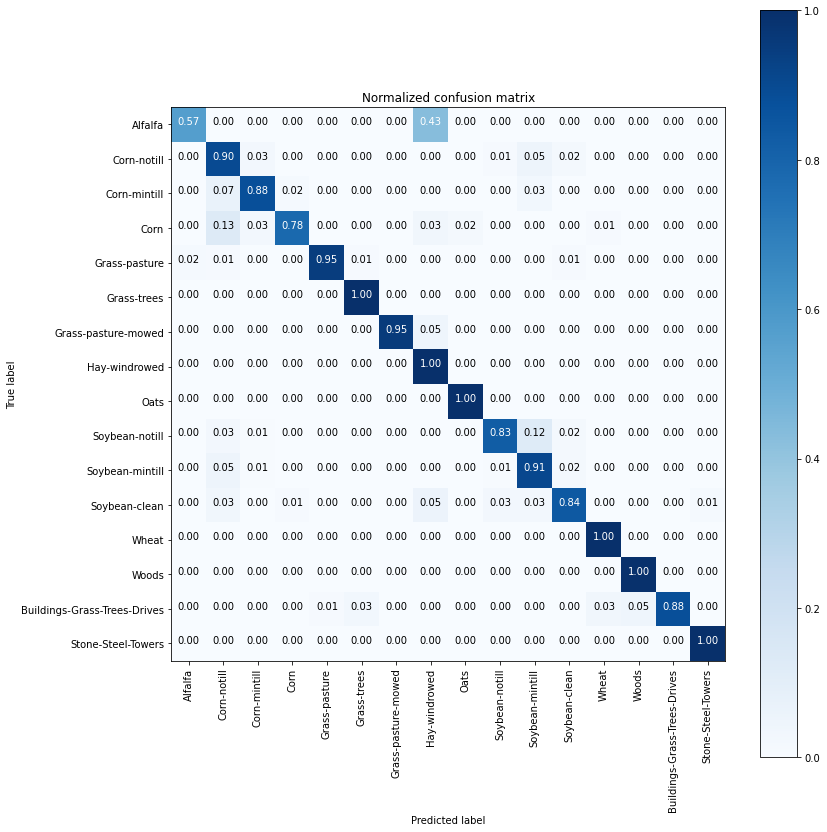

In [12]:
plt.figure(figsize=(12,12))
plot_confusion_matrix(confusion, classes=target_names, normalize=True, title='Normalized confusion matrix')
plt.savefig("./result/confusion_matrix_with_normalization.svg")
# plt.show()

In [13]:
# apply PCA preprocessing for data sets
def applyPCA(X, numComponents=75):
    newX = np.reshape(X, (-1, X.shape[2]))
    pca = PCA(n_components=numComponents, whiten=True)
    newX = pca.fit_transform(newX)
    newX = np.reshape(newX, (X.shape[0],X.shape[1], numComponents))
    return newX, pca

# slice(start, stop[, step]) 函数实现切片对象，主要用在切片操作函数里的参数传递。
def Patch(data,height_index,width_index):
    #transpose_array = data.transpose((2,0,1))
    #print transpose_array.shape
    height_slice = slice(height_index, height_index+PATCH_SIZE)     # 
    width_slice = slice(width_index, width_index+PATCH_SIZE)
    patch = data[height_slice, width_slice, :]
    
    return patch

In [14]:
# load the original image
X, y = loadIndianPinesData()
# X, y = loadHSIData()
X, pca = applyPCA(X, numComponents=numPCAcomponents)

In [15]:
height = y.shape[0]
width = y.shape[1]
PATCH_SIZE = 5
numComponents = 30
height, width

(145, 145)

In [16]:
# calculate the predicted image
# 因为经过 padding 和 patch 操作，预测过程有一点曲折
outputs = np.zeros((height,width))              # 145*145 ?????????  # 边缘是0，没有计算
for i in range(height-PATCH_SIZE+1):            # 0 - 140
    for j in range(width-PATCH_SIZE+1):        # 0 - 140
        # print(i)
        # print(j)
        p = int(PATCH_SIZE/2)          # 2
        # print(y[i+p][j+p])
        # target = int(y[i+PATCH_SIZE/2, j+PATCH_SIZE/2])
        target = y[i+p][j+p]             # y[2-142]
        if target == 0:
            continue
        else:
            image_patch=Patch(X,i,j)   # 创建 patch 的逆操作，切片
            # print (image_patch.shape)   # 5*5*30
            X_test_image = image_patch.reshape(1,image_patch.shape[0],image_patch.shape[1],image_patch.shape[2]).astype('float32')  # 1*5*5*30    
            # print(X_test_image.shape)
            # prediction = (model.predict_classes(X_test_image))
            prediction = np.argmax(model.predict(X_test_image), axis=-1)
            print(prediction)
            outputs[i+p][j+p] = prediction+1

[2]
[2]
[2]
[2]
[11]
[2]
[2]
[2]
[1]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[11]
[11]
[11]
[14]
[14]
[14]
[14]
[14]
[14]
[5]
[5]


KeyboardInterrupt: 

In [ ]:
ground_truth = spectral.imshow(classes=y, figsize=(6, 6))

In [ ]:
predict_image = spectral.imshow(classes=outputs.astype(int), figsize=(6, 6))